In [202]:
import bs4 as bs
import requests
import yfinance as yf
import datetime

resp = requests.get('http://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
soup = bs.BeautifulSoup(resp.text, 'lxml')
table = soup.find('table', {'class': 'wikitable sortable'})
tickers = []
for row in table.findAll('tr')[1:]:
    ticker = row.findAll('td')[0].text
    tickers.append(ticker)

tickers = [s.replace('\n', '') for s in tickers]
start = datetime.datetime(2018,1,2)
end = datetime.datetime(2021,1,18)
df= yf.download(tickers, start=start, end=end)
print(df)

[*********************100%***********************]  505 of 505 completed

2 Failed downloads:
- BF.B: No data found for this date range, symbol may be delisted
- BRK.B: No data found, symbol may be delisted
             Adj Close                                                 \
                     A        AAL         AAP        AAPL        ABBV   
Date                                                                    
2018-01-02   65.877853  51.647556  104.754112   41.442081   82.745354   
2018-01-03   67.554039  51.014027  105.702019   41.434864   84.040207   
2018-01-04   67.047279  51.335667  109.602280   41.627323   83.560951   
2018-01-05   68.119247  51.316177  110.767433   42.101261   85.015579   
2018-01-08   68.265442  50.809345  109.987381   41.944889   83.653427   
...                ...        ...         ...         ...         ...   
2021-01-11  128.149994  15.000000  171.020004  128.979996  107.759651   
2021-01-12  126.970001  15.380000  176.669998  128.800003  108.

In [203]:
import numpy as np
import pandas as pd

In [204]:
df = df['Adj Close']
df

,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,65.877853,51.647556,104.754112,41.442081,82.745354,89.101776,192.490005,55.684303,146.372726,177.699997,...,64.657593,72.152405,65.490776,25.918779,65.562332,77.388687,121.132782,103.709999,46.599628,70.380058
2018-01-03,67.554039,51.014027,105.702019,41.434864,84.040207,89.433365,195.820007,55.807426,147.048264,181.039993,...,65.953041,73.569473,65.266426,25.883478,66.361748,77.322296,121.972481,105.769997,46.544483,70.703651
2018-01-04,67.047279,51.335667,109.602280,41.627323,83.560951,89.234398,199.250000,55.712711,148.789413,183.220001,...,67.143723,73.671303,65.256653,26.201174,66.804810,78.109459,121.796738,107.860001,46.737503,71.125328
2018-01-05,68.119247,51.316177,110.767433,42.101261,85.015579,90.314545,202.320007,55.873722,150.016815,185.339996,...,70.629974,73.611900,66.173569,26.395323,66.679596,78.564674,123.007484,109.540001,46.755882,71.939262
2018-01-08,68.265442,50.809345,109.987381,41.944889,83.653427,91.811577,207.800003,55.712711,151.215637,185.039993,...,71.096703,73.942833,66.622284,26.704195,66.920395,78.697456,123.241814,110.629997,46.526104,72.802223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-11,128.149994,15.000000,171.020004,128.979996,107.759651,107.349998,324.589996,110.395256,259.463379,474.239990,...,151.080002,46.840000,58.500000,23.440001,106.019997,107.669998,159.000000,413.790009,49.869999,169.127884
2021-01-12,126.970001,15.380000,176.669998,128.800003,108.510864,106.519997,324.670013,108.403282,257.519989,471.649994,...,146.669998,47.880001,59.950001,23.219999,105.830002,107.669998,159.830002,407.950012,50.360001,165.862946
2021-01-13,126.980003,15.530000,171.759995,130.889999,111.150002,105.620003,323.709991,111.700005,257.079987,472.049988,...,141.169998,48.419998,59.509998,22.940001,105.209999,107.150002,162.949997,412.450012,49.790001,161.699402


In [211]:
# drop tickers that didn't contain full data in the time range
df=df.drop([col for col in df.columns if np.isnan(df[col][0])==1], axis=1)
df

,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,65.877853,51.647556,104.754112,41.442081,82.745354,89.101776,192.490005,55.684303,146.372726,177.699997,...,64.657593,72.152405,65.490776,25.918779,65.562332,77.388687,121.132782,103.709999,46.599628,70.380058
2018-01-03,67.554039,51.014027,105.702019,41.434864,84.040207,89.433365,195.820007,55.807426,147.048264,181.039993,...,65.953041,73.569473,65.266426,25.883478,66.361748,77.322296,121.972481,105.769997,46.544483,70.703651
2018-01-04,67.047279,51.335667,109.602280,41.627323,83.560951,89.234398,199.250000,55.712711,148.789413,183.220001,...,67.143723,73.671303,65.256653,26.201174,66.804810,78.109459,121.796738,107.860001,46.737503,71.125328
2018-01-05,68.119247,51.316177,110.767433,42.101261,85.015579,90.314545,202.320007,55.873722,150.016815,185.339996,...,70.629974,73.611900,66.173569,26.395323,66.679596,78.564674,123.007484,109.540001,46.755882,71.939262
2018-01-08,68.265442,50.809345,109.987381,41.944889,83.653427,91.811577,207.800003,55.712711,151.215637,185.039993,...,71.096703,73.942833,66.622284,26.704195,66.920395,78.697456,123.241814,110.629997,46.526104,72.802223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-11,128.149994,15.000000,171.020004,128.979996,107.759651,107.349998,324.589996,110.395256,259.463379,474.239990,...,151.080002,46.840000,58.500000,23.440001,106.019997,107.669998,159.000000,413.790009,49.869999,169.127884
2021-01-12,126.970001,15.380000,176.669998,128.800003,108.510864,106.519997,324.670013,108.403282,257.519989,471.649994,...,146.669998,47.880001,59.950001,23.219999,105.830002,107.669998,159.830002,407.950012,50.360001,165.862946
2021-01-13,126.980003,15.530000,171.759995,130.889999,111.150002,105.620003,323.709991,111.700005,257.079987,472.049988,...,141.169998,48.419998,59.509998,22.940001,105.209999,107.150002,162.949997,412.450012,49.790001,161.699402


In [213]:
stock_monthly_returns = df.resample('M').ffill().pct_change()

In [214]:
stock_monthly_returns.mean()

A       0.018278
AAL    -0.022848
AAP     0.015260
AAPL    0.037138
ABBV    0.008165
          ...   
YUM     0.011074
ZBH     0.010993
ZBRA    0.040297
ZION    0.005776
ZTS     0.022753
Length: 494, dtype: float64

In [215]:
# the higher the rank, the more returns
stock_monthly_returns.mean().rank(ascending=False)

A       117.0
AAL     494.0
AAP     159.0
AAPL     14.0
ABBV    312.0
        ...  
YUM     245.0
ZBH     247.0
ZBRA      9.0
ZION    355.0
ZTS      66.0
Length: 494, dtype: float64

In [232]:
stock_monthly_returns.std()

A       0.070539
AAL     0.141193
AAP     0.103063
AAPL    0.098739
ABBV    0.090907
          ...   
YUM     0.079888
ZBH     0.088047
ZBRA    0.117762
ZION    0.108339
ZTS     0.053721
Length: 494, dtype: float64

In [216]:
# the higher the rank, the less volatile
stock_monthly_returns.std().rank(ascending=True)

A       131.0
AAL     446.0
AAP     346.0
AAPL    326.0
ABBV    288.0
        ...  
YUM     204.0
ZBH     269.0
ZBRA    397.0
ZION    365.0
ZTS      34.0
Length: 494, dtype: float64

In [217]:
tickers = (stock_monthly_returns.mean().rank(ascending=False)+stock_monthly_returns.std().rank(ascending=True)).nsmallest(5).reset_index()['index']
tickers

0     NEE
1    MSFT
2     AWK
3     ZTS
4    COST
Name: index, dtype: object

In [218]:
df=df[tickers]
df

,NEE,MSFT,AWK,ZTS,COST
Date,,,,,
2018-01-02,35.516525,82.383636,84.360161,70.380058,178.326767
2018-01-03,34.763092,82.767044,83.763557,70.703651,180.466812
2018-01-04,34.584469,83.495522,82.968071,71.125328,179.065369
2018-01-05,34.742477,84.530701,82.153633,71.939262,177.786987
2018-01-08,35.028736,84.616966,82.863884,72.802223,178.478241
...,...,...,...,...,...
2021-01-11,79.690002,217.490005,156.639999,169.127884,364.010010
2021-01-12,79.750000,214.929993,156.229996,165.862946,364.200012
2021-01-13,81.839996,216.339996,159.690002,161.699402,366.950012


In [219]:
# Log of percentage change
cov_matrix = df.pct_change().apply(lambda x: np.log(1+x)).cov()
cov_matrix

,NEE,MSFT,AWK,ZTS,COST
NEE,0.000297,0.000166,0.000244,0.000166,0.000106
MSFT,0.000166,0.000411,0.000161,0.000249,0.000188
AWK,0.000244,0.000161,0.000316,0.000161,0.000120
ZTS,0.000166,0.000249,0.000161,0.000330,0.000142
COST,0.000106,0.000188,0.000120,0.000142,0.000210


In [220]:
corr_matrix = df.pct_change().apply(lambda x: np.log(1+x)).corr()
corr_matrix

,NEE,MSFT,AWK,ZTS,COST
NEE,1.000000,0.475829,0.795178,0.530163,0.425941
MSFT,0.475829,1.000000,0.446099,0.675815,0.638554
AWK,0.795178,0.446099,1.000000,0.498840,0.464874
ZTS,0.530163,0.675815,0.498840,1.000000,0.539681
COST,0.425941,0.638554,0.464874,0.539681,1.000000


In [221]:
# initialize weights
w = {}
for ticker in df.columns:
    w[ticker] = 1/len(df)

In [222]:
port_var = cov_matrix.mul(w, axis=0).mul(w, axis=1).sum().sum()
port_var

8.446910083570579e-09

In [223]:
month_returns = df.resample('M').ffill().pct_change().mean()
month_returns

NEE     0.023976
MSFT    0.025294
AWK     0.020907
ZTS     0.022753
COST    0.020054
dtype: float64

In [224]:
quarter_returns = df.resample('Q').ffill().pct_change().mean()
quarter_returns

NEE     0.068263
MSFT    0.081338
AWK     0.062537
ZTS     0.062368
COST    0.064444
dtype: float64

In [225]:
half_year_returns = df.resample('6M').ffill().pct_change().mean()
half_year_returns

NEE     0.148669
MSFT    0.157590
AWK     0.126389
ZTS     0.139834
COST    0.122591
dtype: float64

In [226]:
year_returns = df.resample('Y').ffill().pct_change().mean()
year_returns

NEE     0.270913
MSFT    0.318999
AWK     0.229135
ZTS     0.263640
COST    0.248289
dtype: float64

In [227]:
returns = pd.concat([month_returns,quarter_returns, half_year_returns,year_returns], axis=1) # Creating a table for visualising returns and volatility of assets
returns.columns = ['month_returns','quarter_returns', 'half_year_returns', 'year_returns']

In [228]:
returns = returns.sort_values(by=['year_returns','half_year_returns','quarter_returns','month_returns'],ascending=False)
print(returns.to_string())

      month_returns  quarter_returns  half_year_returns  year_returns
MSFT       0.025294         0.081338           0.157590      0.318999
NEE        0.023976         0.068263           0.148669      0.270913
ZTS        0.022753         0.062368           0.139834      0.263640
COST       0.020054         0.064444           0.122591      0.248289
AWK        0.020907         0.062537           0.126389      0.229135


In [233]:
# calculate (max-min)/mean as a way to measure volatility
(df.resample('Y').max()-df.resample('Y').min())/df.resample('Y').mean()


,NEE,MSFT,AWK,ZTS,COST
Date,,,,,
2018-12-31,0.254611,0.314769,0.269449,0.280508,0.321816
2019-12-31,0.376323,0.486180,0.373289,0.474025,0.408788
2020-12-31,0.508915,0.503320,0.510015,0.568137,0.363264
2021-12-31,0.104701,0.034118,0.061040,0.051074,0.048840


In [234]:
# Yearly returns for individual companies
ind_er = df.resample('Y').last().pct_change().mean()
ind_er

NEE     0.270913
MSFT    0.318999
AWK     0.229135
ZTS     0.263640
COST    0.248289
dtype: float64

In [235]:
# Portfolio returns
w = [0.2, 0.2, 0.2, 0.2,0.2]
port_er = (w*ind_er).sum()
port_er

0.26619510420407966

In [236]:
# Volatility is given by the annual standard deviation. We multiply by 250 because there are 250 trading days/year.
ann_sd = df.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250))
ann_sd

NEE     0.272655
MSFT    0.320590
AWK     0.280901
ZTS     0.287326
COST    0.229048
dtype: float64

In [237]:
assets = pd.concat([ind_er, ann_sd], axis=1) # Creating a table for visualising returns and volatility of assets
assets.columns = ['One_Year_Returns', 'Volatility']
assets

,One_Year_Returns,Volatility
NEE,0.270913,0.272655
MSFT,0.318999,0.320590
AWK,0.229135,0.280901
ZTS,0.263640,0.287326
COST,0.248289,0.229048


In [238]:
p_ret = [] # Define an empty array for portfolio returns
p_vol = [] # Define an empty array for portfolio volatility
p_weights = [] # Define an empty array for asset weights

num_assets = len(df.columns)
num_portfolios = 10000

In [239]:
for portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights = weights/np.sum(weights)
    p_weights.append(weights)
    returns = np.dot(weights, ind_er) # Returns are the product of individual expected returns of asset and its 
                                      # weights 
    p_ret.append(returns)
    var = cov_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum()# Portfolio Variance
    sd = np.sqrt(var) # Daily standard deviation
    ann_sd = sd*np.sqrt(250) # Annual standard deviation = volatility
    p_vol.append(ann_sd)

In [240]:
data = {'Returns':p_ret, 'Volatility':p_vol}

for counter, symbol in enumerate(df.columns.tolist()):
    #print(counter, symbol)
    data[symbol +' weight'] = [w[counter] for w in p_weights]

In [241]:
p_ret

[0.27305777538492915,
 0.2641369298902819,
 0.26477253719878296,
 0.26609071433618503,
 0.24836945693149826,
 0.27249417686852107,
 0.2890204862879233,
 0.27699542182042314,
 0.2719452907751273,
 0.26743491238101225,
 0.26596842171127666,
 0.2653359910242598,
 0.26562519219041114,
 0.28139937864404085,
 0.2886803273380859,
 0.2501353633750564,
 0.283867631847405,
 0.2639196706711732,
 0.27712171963810084,
 0.2773003764065458,
 0.26185869998607103,
 0.28151633286605815,
 0.25877991274108575,
 0.26923564015766643,
 0.26572686783584953,
 0.2564274903541685,
 0.2694835469352622,
 0.2652856576911745,
 0.25329433006916124,
 0.2667093477163257,
 0.2756662063351371,
 0.2622304601009318,
 0.2665774198922407,
 0.27303168445039,
 0.27616589796038626,
 0.26893235821460376,
 0.2539490513135171,
 0.2650715054961419,
 0.2621830690065042,
 0.24681401845346204,
 0.2660518938994188,
 0.261216527752853,
 0.24928851452854534,
 0.27645167685713506,
 0.2688797016440866,
 0.2671097377983199,
 0.2687984429431

In [244]:
portfolios = pd.DataFrame(data)
portfolios.head() # Dataframe of the 10000 portfolios created

,Returns,Volatility,NEE weight,MSFT weight,AWK weight,ZTS weight,COST weight
0,0.273058,0.229450,0.167644,0.311561,0.182508,0.159040,0.179247
1,0.264137,0.218783,0.285129,0.128615,0.147502,0.203771,0.234982
2,0.264773,0.224784,0.120897,0.253867,0.301893,0.102924,0.220419
3,0.266091,0.227761,0.407195,0.166930,0.212633,0.055924,0.157318
4,0.248369,0.214837,0.092258,0.039304,0.368570,0.148106,0.351762


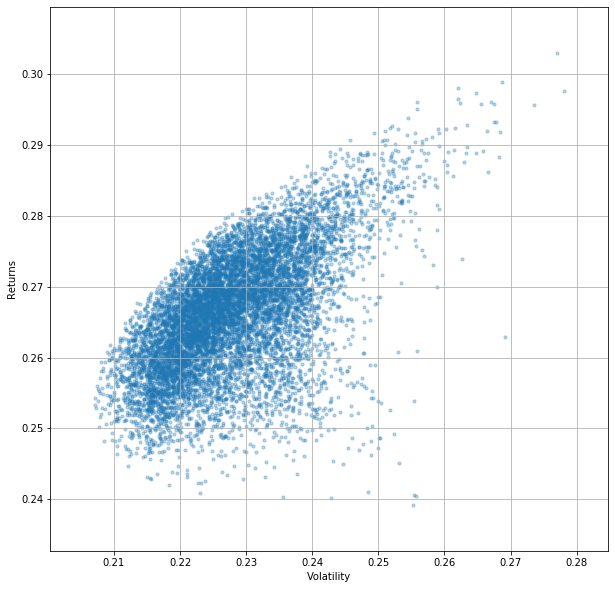

In [245]:
# Plot efficient frontier
portfolios.plot.scatter(x='Volatility', y='Returns', marker='o', s=10, alpha=0.3, grid=True, figsize=[10,10])

In [246]:
min_vol_port = portfolios.iloc[portfolios['Volatility'].idxmin()]
# idxmin() gives us the minimum value in the column specified.                               
min_vol_port

Returns        0.253280
Volatility     0.207067
NEE weight     0.188756
MSFT weight    0.012221
AWK weight     0.133609
ZTS weight     0.157354
COST weight    0.508060
Name: 3041, dtype: float64

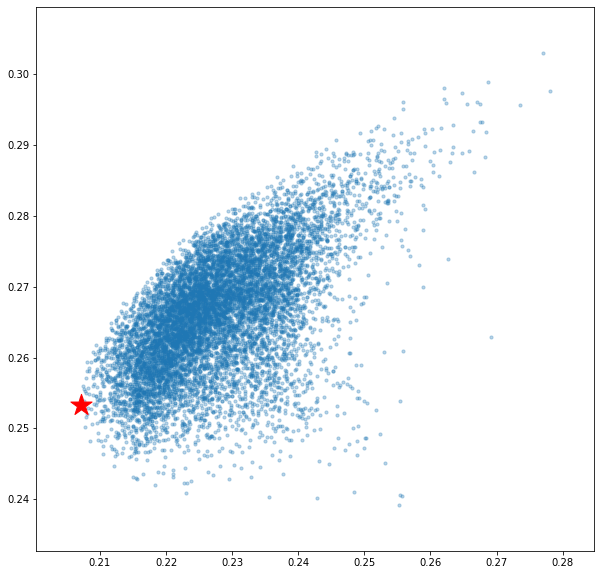

In [247]:
# plotting the minimum volatility portfolio
import matplotlib.pyplot as plt
plt.subplots(figsize=[10,10])
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)

In [248]:
# Finding the optimal portfolio
rf = 0.01 # risk factor
optimal_risky_port = portfolios.iloc[((portfolios['Returns']-rf)/portfolios['Volatility']).idxmax()]
optimal_risky_port

Returns        0.267718
Volatility     0.213444
NEE weight     0.367966
MSFT weight    0.135043
AWK weight     0.000948
ZTS weight     0.102459
COST weight    0.393584
Name: 2080, dtype: float64

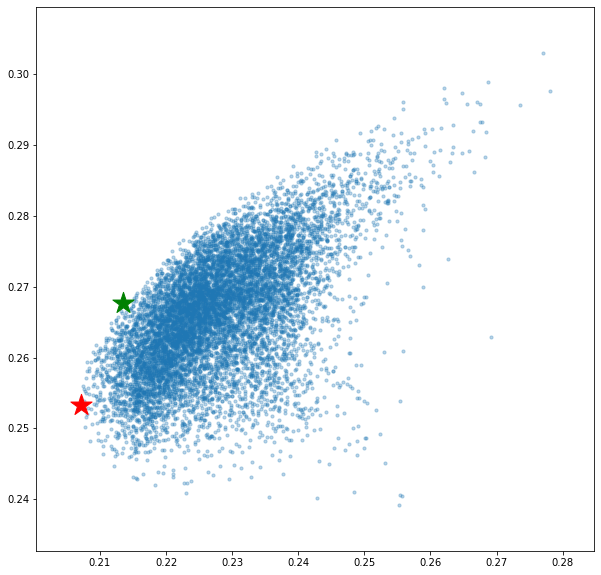

In [249]:
# Plotting optimal portfolio
plt.subplots(figsize=(10, 10))
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)
plt.scatter(optimal_risky_port[1], optimal_risky_port[0], color='g', marker='*', s=500)

In [250]:
portfolios=portfolios.sort_values(by=['Returns','Volatility'],ascending=[False, True])

In [251]:
portfolios.loc[portfolios['Volatility']<0.28]

,Returns,Volatility,NEE weight,MSFT weight,AWK weight,ZTS weight,COST weight
1438,0.303084,0.277024,0.154077,0.712352,0.027499,0.095471,0.010600
6732,0.298986,0.268723,0.144377,0.653731,0.027992,0.113452,0.060448
9288,0.298063,0.261981,0.239537,0.614553,0.010783,0.072094,0.063034
6112,0.297663,0.278130,0.007978,0.702809,0.142469,0.145055,0.001690
8896,0.297411,0.264833,0.154380,0.624397,0.020328,0.121702,0.079193
...,...,...,...,...,...,...,...
9037,0.240556,0.255344,0.172996,0.022848,0.715806,0.029217,0.059132
9834,0.240448,0.255662,0.026187,0.055637,0.766763,0.151100,0.000313
2801,0.240323,0.235644,0.059568,0.006379,0.623413,0.141734,0.168907
1802,0.240214,0.242848,0.094678,0.040954,0.685002,0.000480,0.178886


In [2]:
import datetime as dt 
start, end  = dt.datetime(2018,1,1), dt.datetime(2021,1,15)
df = web.DataReader("AAPL","yahoo",start,end)
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-02,43.075001,42.314999,42.540001,43.064999,102223600.0,41.442081
2018-01-03,43.637501,42.990002,43.132500,43.057499,118071600.0,41.434864
2018-01-04,43.367500,43.020000,43.134998,43.257500,89738400.0,41.627323
2018-01-05,43.842499,43.262501,43.360001,43.750000,94640000.0,42.101261
2018-01-08,43.902500,43.482498,43.587502,43.587502,82271200.0,41.944889
...,...,...,...,...,...,...
2021-01-11,130.169998,128.500000,129.190002,128.979996,100620900.0,128.979996
2021-01-12,129.690002,126.860001,128.500000,128.800003,91951100.0,128.800003
2021-01-13,131.449997,128.490005,128.759995,130.889999,88636800.0,130.889999


In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.plot(df['Close'],label = 'Adj Close')

C:\Users\suc002t\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


In [4]:
df= df["Adj Close"]
df

Date
2018-01-02     41.442081
2018-01-03     41.434864
2018-01-04     41.627323
2018-01-05     42.101261
2018-01-08     41.944889
                 ...    
2021-01-11    128.979996
2021-01-12    128.800003
2021-01-13    130.889999
2021-01-14    128.910004
2021-01-15    127.139999
Name: Adj Close, Length: 766, dtype: float64

In [5]:
train_size = int(len(df) * 0.6)
validation_size = int(len(df)*0.2)
train, validation, test = df[0:train_size],df[train_size:(train_size+validation_size)], df[(train_size+validation_size):len(df)]

In [6]:
train

Date
2018-01-02    41.442081
2018-01-03    41.434864
2018-01-04    41.627323
2018-01-05    42.101261
2018-01-08    41.944889
                ...    
2019-10-22    59.298336
2019-10-23    60.094048
2019-10-24    60.192894
2019-10-25    60.934254
2019-10-28    61.544628
Name: Adj Close, Length: 459, dtype: float64

In [7]:
validation

Date
2019-10-29    60.121231
2019-10-30    60.113815
2019-10-31    61.472961
2019-11-01    63.217617
2019-11-04    63.632767
                ...    
2020-06-02    80.550545
2020-06-03    80.993980
2020-06-04    80.296448
2020-06-05    82.583374
2020-06-08    83.071640
Name: Adj Close, Length: 153, dtype: float64

In [8]:
test

Date
2020-06-09     85.694878
2020-06-10     87.899590
2020-06-11     83.679497
2020-06-12     84.401947
2020-06-15     85.445755
                 ...    
2021-01-11    128.979996
2021-01-12    128.800003
2021-01-13    130.889999
2021-01-14    128.910004
2021-01-15    127.139999
Name: Adj Close, Length: 154, dtype: float64

In [9]:
print('Observations: %d' % (len(df)))
print('Training Observations: %d' % (len(train)))
print('Validation Observations: %d' % (len(validation)))
print('Testing Observations: %d' % (len(test)))

Observations: 766
Training Observations: 459
Validation Observations: 153
Testing Observations: 154


# Moving Average

In [10]:
type(train)

pandas.core.series.Series